# Stock prices dataset
The data is of tock exchange's stock listings for each trading day of 2010 to 2016.

## Description
A brief description of columns.
- open: The opening market price of the equity symbol on the date
- high: The highest market price of the equity symbol on the date
- low: The lowest recorded market price of the equity symbol on the date
- close: The closing recorded price of the equity symbol on the date
- symbol: Symbol of the listed company
- volume: Total traded volume of the equity symbol on the date
- date: Date of record

In this assignment, we will work on the stock prices dataset named "prices.csv". Task is to create a Neural Network to classify closing price for a stock based on some parameters.

## Question 1

### Load the data
- load the csv file and read it using pandas
- file name is prices.csv

In [18]:
# run this cell to to mount the google drive if you are using google colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv('/content/drive/My Drive/prices.csv')

In [21]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


## Question 2

### Drop null
- Drop null values if any

In [22]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

### Drop columns
- Now, we don't need "date", "volume" and "symbol" column
- drop "date", "volume" and "symbol" column from the data


In [23]:
df.drop(['date', 'volume', 'symbol'], axis=1, inplace=True)

In [24]:
df.head()

,open,close,low,high
0,123.430000,125.839996,122.309998,126.250000
1,125.239998,119.980003,119.940002,125.540001
2,116.379997,114.949997,114.930000,119.739998
3,115.480003,116.620003,113.500000,117.440002
4,117.010002,114.970001,114.089996,117.330002


## Question 3

### Print the dataframe
- print the modified dataframe

In [25]:
df.sample(5)

,open,close,low,high
402420,81.449997,81.400002,81.029999,81.699997
119121,29.280001,29.570000,28.980000,29.639999
415618,67.730003,67.300003,66.480003,67.730003
276431,17.170000,16.879999,16.840000,17.330000
64115,38.630001,39.930000,38.540001,39.950001


### Get features and label from the dataset in separate variable
- Let's separate labels and features now. We are going to predict the value for "close" column so that will be our label. Our features will be "open", "low", "high"
- Take "open" "low", "high" columns as features
- Take "close" column as label

In [26]:
x = df.drop(['close'], axis=1)
x.head()

,open,low,high
0,123.430000,122.309998,126.250000
1,125.239998,119.940002,125.540001
2,116.379997,114.930000,119.739998
3,115.480003,113.500000,117.440002
4,117.010002,114.089996,117.330002


In [27]:
y =  df['close']
y.head()

0    125.839996
1    119.980003
2    114.949997
3    116.620003
4    114.970001
Name: close, dtype: float64

## Question 4

### Create train and test sets
- Split the data into training and testing

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(595884, 3)
(255380, 3)
(595884,)
(255380,)


## Question 5

### Scaling
- Scale the data (features only)
- Use StandarScaler

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
sc = StandardScaler()

In [34]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
X_train

array([[-0.10868706, -0.10420252, -0.09860727],
       [-0.08264803, -0.0771819 , -0.08719303],
       [-0.4381945 , -0.43426619, -0.42664809],
       ...,
       [-0.3341585 , -0.33296913, -0.33771205],
       [ 0.08402559,  0.09015212,  0.08390184],
       [-0.09464757, -0.08723893, -0.09694269]])

## Question 6

### Convert data to NumPy array
- Convert features and labels to numpy array

In [36]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [37]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [38]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Question 7

### Define Model
- Initialize a Sequential model
- Add a Flatten layer
- Add a Dense layer with one neuron as output
  - add 'linear' as activation function


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [40]:
model = Sequential()
model.add(Flatten())
model.add(Dense(1, activation='linear'))

## Question 8

### Compile the model
- Compile the model
- Use "sgd" optimizer
- for calculating loss, use mean squared error

In [41]:
model.compile(optimizer='sgd', loss='mean_squared_error')

## Question 9

### Fit the model
- epochs: 50
- batch size: 128
- specify validation data

In [42]:
model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/50
4656/4656 [==============================] - 11s 2ms/step - loss: 248.1780 - val_loss: 1.0262
Epoch 2/50
4656/4656 [==============================] - 9s 2ms/step - loss: 0.9743 - val_loss: 1.0083
Epoch 3/50
4656/4656 [==============================] - 9s 2ms/step - loss: 0.9678 - val_loss: 1.0063
Epoch 4/50
4656/4656 [==============================] - 9s 2ms/step - loss: 0.9759 - val_loss: 0.9943
Epoch 5/50
4656/4656 [==============================] - 9s 2ms/step - loss: 0.9641 - val_loss: 1.0093
Epoch 6/50
4656/4656 [==============================] - 9s 2ms/step - loss: 0.9301 - val_loss: 0.9797
Epoch 7/50
4656/4656 [==============================] - 9s 2ms/step - loss: 0.9235 - val_loss: 0.9725
Epoch 8/50
4656/4656 [==============================] - 9s 2ms/step - loss: 0.9214 - val_loss: 0.9816
Epoch 9/50
4656/4656 [==============================] - 9s 2ms/step - loss: 0.9220 - val_loss: 0.9671
Epoch 10/50
4656/4656 [==============================] - 9s 2ms/step - loss: 0.

## Question 10

### Evaluate the model
- Evaluate the model on test data

In [44]:
model.evaluate(X_test, y_test)

7981/7981 [==============================] - 9s 1ms/step - loss: 0.7522


0.752217710018158

### Manual predictions
- Test the predictions on manual inputs
- We have scaled out training data, so we need to transform our custom inputs using the object of the scaler
- Example of manual input: [123.430000,	122.30999, 116.250000]

In [140]:
open = 122.30999
low = 116.250000
high = 123.430000

122.30999, 116.250000, 123.430000

(122.30999, 116.25, 123.43)

In [45]:
model.predict(sc.transform([[122.30999, 116.25, 123.43]]))

array([[120.12314]], dtype=float32)

# Build a DNN

### Collect Fashion mnist data from tf.keras.datasets 

In [9]:
import tensorflow as tf

In [10]:
(X_train,Y_train),(x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [11]:
print(X_train.shape)
print(x_test.shape)
print(Y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


### Change train and test labels into one-hot vectors

In [12]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [13]:
y_test = tf.keras.utils.to_categorical(y_test)

In [185]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [186]:
Y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [187]:
Y_train = tf.keras.utils.to_categorical(Y_train)

In [188]:
Y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Build the Graph

### Initialize model, reshape & normalize data

In [190]:
model1 = Sequential()
model1.add(tf.keras.layers.Reshape((784,),input_shape=(28,28)))
model1.add(tf.keras.layers.BatchNormalization())

In [191]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
Total params: 3,136
Trainable params: 1,568
Non-trainable params: 1,568
_________________________________________________________________


### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [192]:
model1.add(tf.keras.layers.Dense(200, activation='relu'))
model1.add(tf.keras.layers.Dense(100, activation='relu')) 
model1.add(tf.keras.layers.Dropout(0.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

###Also add callback, such that if validation loss doesn't decreases consecutively 2 times, stop the training

In [193]:
model1.add(Dense(10, activation='softmax'))

In [194]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=2,monitor='val_loss')

In [195]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

### Print model summary

In [196]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_14 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_15 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1010      
Total params: 181,246
Trainable params: 179,678
Non-trainable params: 1,568
____________________________________________

###Train your model, use test data as validation set

In [197]:
history = model1.fit(X_train,Y_train,validation_data=(x_test,y_test),epochs=10,batch_size=32,callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6319 - accuracy: 0.7797 - val_loss: 0.4226 - val_accuracy: 0.8427
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3923 - accuracy: 0.8551 - val_loss: 0.3759 - val_accuracy: 0.8636
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3641 - accuracy: 0.8656 - val_loss: 0.3641 - val_accuracy: 0.8683
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3354 - accuracy: 0.8762 - val_loss: 0.3590 - val_accuracy: 0.8743
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3114 - accuracy: 0.8855 - val_loss: 0.3711 - val_accuracy: 0.8747
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2954 - accuracy: 0.8901 - val_loss: 0.3527 - val_accuracy: 0.8779
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2864 - accuracy: 0.8937 - val_loss: 0.3431 - val_accuracy:

###Predict Labels

In [198]:
model1.predict(x_test)[0]

array([4.2532240e-09, 3.5622609e-08, 1.4006984e-09, 7.3749490e-08,
       6.4040062e-09, 1.4293108e-02, 2.3333745e-07, 1.9249141e-02,
       1.8915715e-07, 9.6645719e-01], dtype=float32)

In [199]:
y_pred = np.argmax(model1.predict(x_test), axis=-1)

In [200]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

###Print Confusion matrix

In [207]:
(trainX_1,trainY_1),(x_test_1,y_test_1) = tf.keras.datasets.fashion_mnist.load_data()

In [208]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_1,y_pred)

array([[866,   3,  14,  29,   6,   0,  75,   0,   7,   0],
       [  2, 977,   1,  16,   1,   0,   2,   0,   1,   0],
       [ 17,   2, 772,  14, 146,   0,  45,   1,   3,   0],
       [ 21,   5,   6, 892,  50,   0,  20,   0,   6,   0],
       [  1,   1,  54,  18, 877,   1,  45,   0,   3,   0],
       [  0,   0,   0,   0,   0, 962,   0,  31,   1,   6],
       [145,   0,  94,  34,  94,   0, 624,   0,   9,   0],
       [  0,   0,   0,   0,   0,  11,   0, 980,   1,   8],
       [  7,   1,   4,   5,   5,   1,   4,   4, 969,   0],
       [  0,   0,   0,   0,   0,  14,   1,  76,   1, 908]])

###Plot training accuracy vs validation accuracy
###Plot training loss vs validation loss

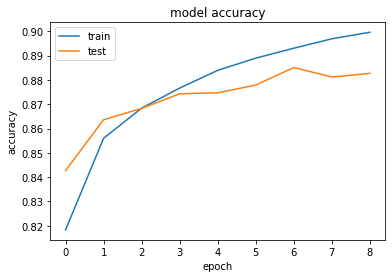

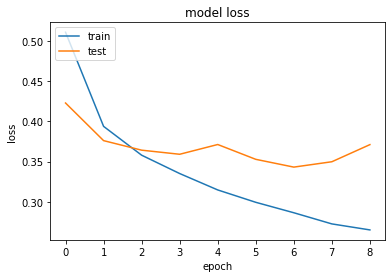

In [210]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()